In [3]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

root = '/Users/grantongo/Desktop/nature methods/figures/figure 3'

df = pd.read_csv(f'{root}/data_singleplex_vs_multiplex.csv')
df = pd.pivot_table(df, values='value',index=['antigen','antigen_concentration'], columns=['panel']).reset_index()

df.head()

panel,antigen,antigen_concentration,multiplex,singleplex
0,CCL21,0.24,3.706380,3.021096
1,CCL21,0.60,-0.459619,-2.093841
2,CCL21,1.51,-0.250056,0.586448
3,CCL21,3.78,-0.599237,-5.495922
4,CCL21,9.44,-2.196610,4.446653


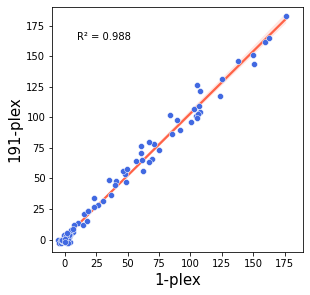

In [4]:
fig, ax = plt.subplots(1,1,figsize=(4.5,4.5))
ax = sbn.regplot(data=df, 
                 x='singleplex',
                 y='multiplex',
                 scatter = False,
                 fit_reg = True, color = 'tomato')
ax = sbn.scatterplot(data=df, x='singleplex', y='multiplex', 
                     color= 'royalblue', 
                     zorder=100)
ax.set_ylabel('191-plex', fontsize=15)
ax.set_xlabel('1-plex', fontsize=15)
ax.set_ylim(-10,190)
ax.set_xlim(-10,190)

rvalue = np.round(linregress(df['singleplex'],df['multiplex']).rvalue,decimals=3)
r2value = np.round(rvalue*rvalue,decimals=3)
ax.text(0.1, 0.9, f'R\u00b2 = {r2value}',ha='left', va='top', transform=ax.transAxes, fontsize=10)

fig.savefig(f'{root}/svg_singleplex.vs.multiplex_{formatted_date}.svg',dpi=400)
fig.savefig(f'{root}/png_singleplex.vs.multiplex_{formatted_date}.png',dpi=200)